In [38]:
import pandas as pd
import numpy as np
data = pd.read_csv("Loan_Train_Home.csv", index_col="Loan_ID")
#data = pd.read_csv("Train_Loan_Home.csv")

In [39]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantDebt,CoApplicantDebt
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,3173.791531,918.649837
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,4709.779724,1858.892887
min,150.000000,0.000000,9.000000,12.00000,0.000000,87.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,1246.500000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,2183.500000,421.500000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,3470.750000,1237.500000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,79960.000000,23702.000000


In [40]:
data.loc[(data["Gender"]=="Female") 
         & (data["Education"]=="Not Graduate") 
         & (data["Loan_Status"]=="Y"), ["Gender","Education","Loan_Status"]]

,Gender,Education,Loan_Status
Loan_ID,,,
LP001155,Female,Not Graduate,Y
LP001669,Female,Not Graduate,Y
LP001692,Female,Not Graduate,Y
LP001908,Female,Not Graduate,Y
LP002300,Female,Not Graduate,Y
LP002314,Female,Not Graduate,Y
LP002407,Female,Not Graduate,Y
LP002489,Female,Not Graduate,Y
LP002502,Female,Not Graduate,Y


In [41]:
#Create a new function:
def num_missing(x):
  return sum(x.isnull())
#Applying per column:
print ("Missing values per column:")
print (data.apply(num_missing, axis=0)) 
#axis=0 defines that function is to be applied on each column
#Applying per row:
print ("\nMissing values per row:")
print (data.apply(num_missing, axis=1).head()) 
#axis=1 defines that function is to be applied on each row


Missing values per column:
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
ApplicantDebt         0
CoApplicantDebt       0
Loan_Status           0
dtype: int64

Missing values per row:
Loan_ID
LP001002    1
LP001003    0
LP001005    0
LP001006    0
LP001008    0
dtype: int64


In [42]:
#First we import a function to determine the mode
from scipy.stats import mode
mode(data['Gender'])
mode(data['Gender']).mode[0]

'Male'

In [43]:
#Impute the values:
data['Gender'].fillna(mode(data['Gender']).mode[0], inplace=True)
data['Married'].fillna(mode(data['Married']).mode[0], inplace=True)
data['Self_Employed'].fillna(mode(data['Self_Employed']).mode[0], inplace=True)
#Now check the #missing values again to confirm:
print (data.apply(num_missing, axis=0))


Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
ApplicantDebt         0
CoApplicantDebt       0
Loan_Status           0
dtype: int64


In [44]:
data.head(20)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,ApplicantDebt,CoApplicantDebt,Loan_Status
Loan_ID,,,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,2276,0,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,2405,249,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,2318,0,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1664,1651,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,3135,0,Y
LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,4001,3435,Y
LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,388,1063,Y
LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,2052,1622,N
LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,3974,444,Y


In [46]:
#Determine pivot table
impute_grps = data.pivot_table(values=["LoanAmount"], index=["Gender","Married","Self_Employed"], aggfunc=np.mean)
print (impute_grps)


                              LoanAmount
Gender Married Self_Employed            
Female No      No             114.691176
               Yes            125.800000
       Yes     No             134.222222
               Yes            282.250000
Male   No      No             129.936937
               Yes            180.588235
       Yes     No             153.882736
               Yes            169.395833


In [47]:
#iterate only through rows with missing LoanAmount
for i,row in data.loc[data['LoanAmount'].isnull(),:].iterrows():
  ind = tuple([row['Gender'],row['Married'],row['Self_Employed']])
  data.loc[i,'LoanAmount'] = impute_grps.loc[ind].values[0]
#Now check the #missing values again to confirm:
print (data.apply(num_missing, axis=0))


Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
ApplicantDebt         0
CoApplicantDebt       0
Loan_Status           0
dtype: int64


In [48]:
pd.crosstab(data["Credit_History"],data["Loan_Status"],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [49]:
def percConvert(ser):
  return ser/float(ser[-1])
myVar = pd.crosstab(data["Credit_History"],data["Loan_Status"], margins=True).apply(percConvert, axis=1)    
print (myVar)

Loan_Status            N         Y  All
Credit_History                         
0.0             0.921348  0.078652  1.0
1.0             0.204211  0.795789  1.0
All             0.317376  0.682624  1.0


In [50]:
prop_rates = pd.DataFrame([1000, 5000, 12000], index=['Rural','Semiurban','Urban'],columns=['rates'])
prop_rates

,rates
Rural,1000
Semiurban,5000
Urban,12000


In [51]:
data_merged = data.merge(right=prop_rates, how='inner',left_on='Property_Area',right_index=True, sort=False)
data_merged.pivot_table(values='Credit_History',index=['Property_Area','rates'], aggfunc=len)


,,Credit_History
Property_Area,rates,
Rural,1000,179.0
Semiurban,5000,233.0
Urban,12000,202.0


In [56]:
data_sorted = data.sort_values(['Loan_Status', 'ApplicantIncome','CoapplicantIncome'], ascending=False)
data_sorted[['ApplicantIncome','CoapplicantIncome', 'Loan_Status']].head(5)

,ApplicantIncome,CoapplicantIncome,Loan_Status
Loan_ID,,,
LP002101,63337,0.0,Y
LP001585,51763,0.0,Y
LP001536,39999,0.0,Y
LP001640,39147,4750.0,Y
LP002422,37719,0.0,Y


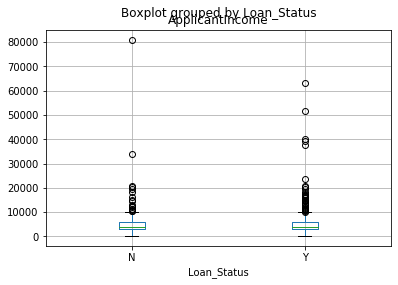

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
data.boxplot(column="ApplicantIncome",by="Loan_Status")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000256E0097FD0>,
      dtype=object)

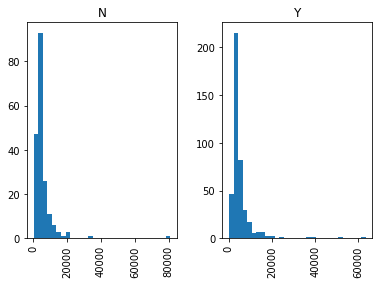

In [54]:
data.hist(column="ApplicantIncome",by="Loan_Status",bins=30)

In [66]:
#Binning:
def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()  
  maxval = col.max()

  #create list by adding min and max to cut_points
  break_points = [minval] + cut_points + [maxval]
  #if no labels provided, use default labels 0 ... (n-1)
  if not labels:
    labels = range(len(cut_points)+1)
  #Binning using cut function of pandas
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  
  return colBin


#Binning age: We can experiment with different cut_points
cut_points = [90,140,190]
cut_points_AI = [1000,2500,5000]
labels = ["Low","Medium","High","Very High"]

print("\nLoanAmount Bin:")
data["LoanAmount_Bin"] = binning(data["LoanAmount"], cut_points, labels)
print (pd.value_counts(data["LoanAmount_Bin"], sort=False))

print("\nApplicantIncome Bin:")
data["ApplicantIncome_Bin"] = binning(data["ApplicantIncome"], cut_points_AI, labels)
print (pd.value_counts(data["ApplicantIncome_Bin"], sort=False))


LoanAmount Bin:
Low          104
Medium       273
High         146
Very High     91
Name: LoanAmount_Bin, dtype: int64

ApplicantIncome Bin:
Low            6
Medium       102
High         315
Very High    191
Name: ApplicantIncome_Bin, dtype: int64


In [59]:
#Define a generic function using Pandas replace function
def coding(col, codeDict):
  colCoded = pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded 
#Coding LoanStatus as Y=1, N=0:
print ('Before Coding Loan Status:')
print (pd.value_counts(data["Loan_Status"]))
data["Loan_Status_Coded"] = coding(data["Loan_Status"], {'N':0,'Y':1})
print ('\nAfter Coding Loan Status:')
print (pd.value_counts(data["Loan_Status_Coded"]))


print ('\n\nBefore Coding Gender:')
print (pd.value_counts(data["Gender"]))
data["Gender_Coded"] = coding(data["Gender"], {'Female':0,'Male':1})
print ('\nAfter Coding Gender:')
print (pd.value_counts(data["Gender_Coded"]))


Before Coding Loan Status:
Y    422
N    192
Name: Loan_Status, dtype: int64

After Coding Loan Status:
1    422
0    192
Name: Loan_Status_Coded, dtype: int64


Before Coding Gender:
Male      502
Female    112
Name: Gender, dtype: int64

After Coding Gender:
1    502
0    112
Name: Gender_Coded, dtype: int64


In [60]:
#Check current type:
data.dtypes

Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
ApplicantDebt           int64
CoApplicantDebt         int64
Loan_Status            object
LoanAmount_Bin       category
Loan_Status_Coded       int64
Gender_Coded            int64
dtype: object

In [ ]:
#Load the file:
colTypes = pd.read_csv('datatypes.csv')
print (colTypes)